In [1]:
import gpytorch 
import torch
import numpy as np

from gp import GPModule
from toy_models.envs.toy_functions import Simulator, TF2D_DEFAULT_CONFIG, minmax

import matplotlib.pyplot as plt

gaussian = GPModule(n_steps=1000)
config = TF2D_DEFAULT_CONFIG
simulator = Simulator(config)

/Users/watson/anaconda3/envs/toymodels/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def generate_data(n_points):
    X = np.random.uniform(10, 15, n_points)
    Y = np.random.uniform(10, 15, n_points)
    Z = simulator.run(X, Y)

    _train_x = torch.tensor(np.concatenate((X[..., None], Y[..., None]), axis=1))
    _train_y = torch.tensor(Z)
    return _train_x, _train_y

In [3]:
def predict_and_plot(_gp):
    _x = np.linspace(10, 15, 100)
    _y = np.linspace(10, 15, 100)
    xx, yy = np.meshgrid(_x, _y)
    _x = xx.ravel()
    _y = yy.ravel()
    test_x = torch.tensor(np.concatenate((_x[..., None], _y[..., None]), axis=1))

    observed, std = _gp.predict(test_x)

    f, ax = plt.subplots(1, 2, figsize=(12,4))
    ax = ax.flatten()

    img0 = ax[0].scatter(test_x.numpy()[:, 0], test_x.numpy()[:, 1],
        c=observed.numpy())
    f.colorbar(img0, ax=ax[0])
    _X = _gp._X[:_gp.length]
    ax[0].scatter(_X[:, 0], _X[:, 1], c='white', s=10, label='training')
    ax[0].legend(loc='lower right')
    ax[0].set_title(f'Prediction with {_gp.length} points')

    img1 = ax[1].scatter(test_x.numpy()[:, 0], test_x.numpy()[:, 1],
        c=std.numpy())
    ax[1].set_title('Std')
    f.colorbar(img1, ax=ax[1])

    plt.show()

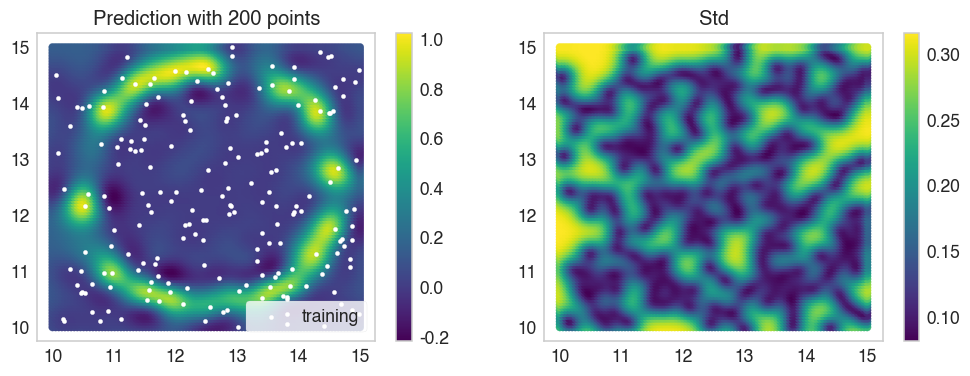

In [4]:
train_x, train_y = generate_data(200)
gaussian.fit(train_x, train_y)
predict_and_plot(gaussian)

In [5]:
train_x, train_y = generate_data(200)
gaussian.fit(train_x, train_y)

In [6]:
_x = np.linspace(10, 15, 100)
_y = np.linspace(10, 15, 100)
xx, yy = np.meshgrid(_x, _y)
_x = xx.ravel()
_y = yy.ravel()
test_x = torch.tensor(np.concatenate((_x[..., None], _y[..., None]), axis=1))
gaussian.model.eval()
gaussian.likelihood.eval()
obs = gaussian.likelihood(gaussian.model(test_x))

In [7]:
obs.loc?